In [20]:

import numpy as np
import scipy.special as spec

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm


import parse_sample_effective_current as ec

In [2]:
paper_plot_runs = ["output-plot-TM010-m10.dat",
                   "output-plot-TE011-m10.dat"]

In [3]:
out = ec.read_OLD_effective_current_output(paper_plot_runs, 
                                           "output-plot-")

In [4]:
plt.rcParams['text.usetex'] = True

In [12]:
def Ez_TM010(r, z):
    out = np.zeros(r.shape)
    x01 = spec.jn_zeros(0, 1)
    return spec.j0(x01*r)

def Ephi_TE011(z, r):
    out = np.zeros(r.shape)
    x11 = spec.jn_zeros(1, 1)
    return spec.j1(x11*r)*np.sin(np.pi*z)

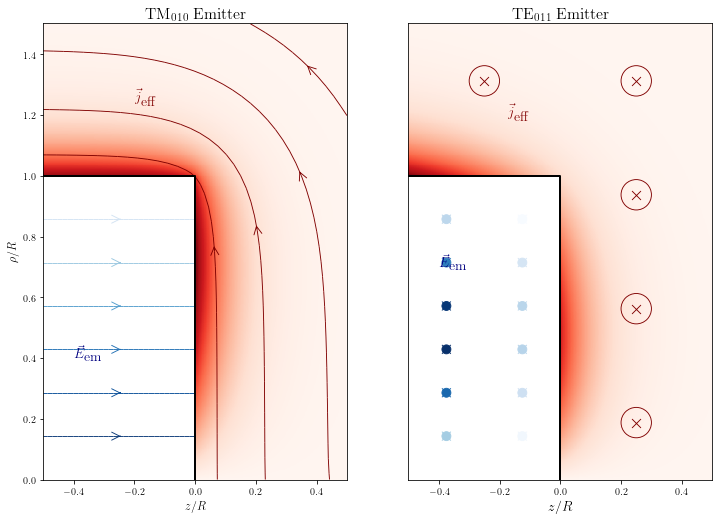

In [28]:
fig, [left, right] = plt.subplots(1,2)

# color plot of |j_eff| for TM010
run = "TM010-m10"
xs = out[run]["x"][:, 0, :]
zs = out[run]["z"][:, 0, :]
j = out[run]["jtotal"][:, 0, :]
abs_max = np.abs(j[np.isfinite(j)]).max()
cplot = left.pcolor(zs, xs, j/abs_max, cmap="Reds", vmin=0, vmax=1)
left.set_aspect("equal")
divider = make_axes_locatable(left)
left.set_title(r"$ \displaystyle {\rm TM}_{010}$ {\rm Emitter}",
               fontsize=16)

# j_eff stream lines for TM010
lw = 0.9
starts = [[0.06, 0.8],
          [0.15, 1],
          [0.35, 1],
          [0.2, 1.49]]
stream = left.streamplot(
          out[run]["z"][0, 0, :], out[run]["x"][:, 0, 0],
          out[run]["re_jz"][:, 0, :],
          out[run]["re_jr"][:, 0, :],
          broken_streamlines=False,
          color="maroon", linewidth=lw,
          start_points=starts, arrowsize=2,
          arrowstyle="->")

# mode lines and crosses for TM010
Ni=200
xi = np.linspace(-0.5, 0, Ni)
yi = np.linspace(0.0, 1, Ni)
r_left_inside, z_left_inside = np.meshgrid(xi, yi)
Nlines=6
Efield_lines = -0.02*np.ones((Nlines,2))
Efield_lines[:, 1] = np.linspace(0,1,Nlines+2)[1:-1]

stream = left.streamplot(
              xi, yi, np.ones((Ni, Ni)), np.zeros((Ni, Ni)), 
              broken_streamlines=False, linewidth=lw, arrowsize=2, cmap="Blues",
              arrowstyle="->", start_points=Efield_lines, 
              color=Ez_TM010(z_left_inside, r_left_inside))
left.text(-0.4, 0.4, r'$\displaystyle \vec{E}_\textrm{em} $',
        color='navy', fontsize=14)
left.text(-0.2, 1.25, r'$\displaystyle \vec{j}_\textrm{eff} $',
        color='maroon', fontsize=14)

# cavity boundary
left.plot([-0.5, 0, 0], [1, 1, 0], marker='',
    linestyle='-', color='black',
    linewidth=2)
left.set_xlabel(r'$ \displaystyle z/R$', size=12)
left.set_ylabel(r'$ \displaystyle \rho/R$', size=12)


# color plot of j_eff_phi for TE011
run = "TE011-m10"
xs = out[run]["x"][:, 0, :]
zs = out[run]["z"][:, 0, :]
j = out[run]["re_jphi"][:, 0, :]
abs_max = np.abs(j[np.isfinite(j)]).max()
cplot = right.pcolor(zs, xs, j/abs_max, cmap="Reds", vmin=0, vmax=1)

Nrows = 6
Ncolumns = 2
Efield_x_2x2, Efield_y_2x2 = np.meshgrid(np.linspace(-0.5, 0, 2*Ncolumns + 1)[1:-1:2],
                                         np.linspace(0, 1, Nrows + 2)[1:-1])
Efield_x = Efield_x_2x2.flatten()
Efield_y = Efield_y_2x2.flatten()
absE = np.absolute(Ephi_TE011(Efield_x, Efield_y))
right.scatter(Efield_x, Efield_y, 
              marker='x', s=80, linewidth=lw,
              c=absE, cmap="Blues")
right.scatter(Efield_x, Efield_y, 
              marker='o', s=80, linewidth=lw,
              facecolors='none', c=absE, cmap="Blues")
# norm = mpl.colors.Normalize(vmin=absE.min(), vmax=absE.max())
# for xp, yp, Ep in zip(Efield_x, Efield_y, absE
#     right.add_patch(plt.Circle((xp, yp), 0.05, 
#                                color=cm.Blues(norm(Ep),bytes=True),
#                                fill=False, linewidth=lw))

j_circ_out = [[ 0.25,  1.5*1/8],
              [ 0.25,  1.5*3/8],
              [ 0.25,  1.5*5/8],
              [ 0.25,  1.5*7/8],
              [-0.25,  1.5*7/8]]
for xp, yp in j_circ_out:
    right.scatter([xp], [yp], marker='x', color="maroon", s=80, linewidth=lw)
    right.add_patch(plt.Circle((xp, yp), 0.05, color="maroon",
                            fill=False, linewidth=lw))
right.text(-0.4, 0.7, r'$\displaystyle \vec{E}_\textrm{em} $',
        color='navy', fontsize=14)
right.text(-0.175, 1.2, r'$\displaystyle \vec{j}_\textrm{eff} $',
        color='maroon', fontsize=14)
right.set_aspect("equal")

right.set_title(r"$ \displaystyle {\rm TE}_{011}$ {\rm Emitter}",
                fontsize=16)
right.set_yticks([])
right.set_yticks([])
right.set_xlabel(r'$z/R$', size=14)
# cavity boundary
right.plot([-0.5, 0, 0], [1, 1, 0], marker='',
    linestyle='-', color='black',
    linewidth=2)


fig.set_size_inches(12, 20)
plt.show()